## IMPORT REQUIRED LIBRARIES

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer


load all the libraries

## READ & LOAD CSV FILE

In [192]:

customers = pd.read_csv("customers_preprocessing_1000.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions_updated.csv")

Read & display the csv file

## TYPE CHECK FOR ALL PRIMARY KEY TO MERGE 3 TABLES

In [193]:
print("transactions:", transactions["customer_id"].dtype)
print("customers:", customers["customer_id"].dtype)
print("products:", products["product_id"].dtype)

transactions: int64
customers: int64
products: int64


cheking datatpes for all he primary keys to merge

## MARGE TABLE

In [194]:


# 1. Merge transactions with customers
merged_data = pd.merge(transactions, customers, on='customer_id', how='left')

# 2. Merge the result with products
df = pd.merge(merged_data, products, on='product_id', how='left')

# 3. Save the fixed dataset to a new CSV file
df.to_csv('merged_transactions_clean.csv', index=False)

# Preview the clean data (No more NaNs!)
df

,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,signup_date,loyalty_score,is_active,category,price,discount,stock_qty,rating
0,T00001,325,11,4,2023-12-24,0,44.0,Other,Rajkot,864504.0,2018-07-10,46.90,1,Groceries,1509.99,5,156,2.5
1,T00002,580,24,4,2022-01-25,1,52.0,Other,Vadodara,NaN,2020-04-11,NaN,1,Books,2901.81,0,436,3.3
2,T00003,343,76,2,2023-06-12,1,26.0,Male,Mumbai,266007.0,2022-05-28,39.17,1,Electronics,23392.87,0,186,1.6
3,T00004,570,22,2,2022-07-01,0,45.0,Male,Mumbai,NaN,2020-08-17,71.53,1,Clothing,2891.78,5,169,1.9
4,T00005,645,52,1,2023-05-14,0,26.0,Other,Delhi,1076659.0,2023-04-03,20.48,0,Home,15124.37,5,237,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00996,206,85,1,2023-12-13,0,63.0,Other,Mumbai,1960377.0,2022-10-12,87.84,1,Electronics,28165.65,5,408,4.3
996,T00997,722,36,4,2022-09-05,1,46.0,Female,Mumbai,639527.0,2018-09-27,4.40,0,Home,22807.24,15,316,4.6
997,T00998,220,40,2,2022-03-11,1,70.0,Female,Rajkot,1083923.0,2018-08-15,84.77,1,Toys,2580.47,0,234,3.2
998,T00999,851,40,1,2024-05-02,0,61.0,Female,Rajkot,1006773.0,2021-06-07,30.94,1,Toys,2580.47,0,234,3.2


## BASIC INFORMATION

In [195]:
df.head()

,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,signup_date,loyalty_score,is_active,category,price,discount,stock_qty,rating
0,T00001,325,11,4,2023-12-24,0,44.0,Other,Rajkot,864504.0,2018-07-10,46.90,1,Groceries,1509.99,5,156,2.5
1,T00002,580,24,4,2022-01-25,1,52.0,Other,Vadodara,NaN,2020-04-11,NaN,1,Books,2901.81,0,436,3.3
2,T00003,343,76,2,2023-06-12,1,26.0,Male,Mumbai,266007.0,2022-05-28,39.17,1,Electronics,23392.87,0,186,1.6
3,T00004,570,22,2,2022-07-01,0,45.0,Male,Mumbai,NaN,2020-08-17,71.53,1,Clothing,2891.78,5,169,1.9
4,T00005,645,52,1,2023-05-14,0,26.0,Other,Delhi,1076659.0,2023-04-03,20.48,0,Home,15124.37,5,237,1.4


In [196]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   str    
 1   customer_id     1000 non-null   int64  
 2   product_id      1000 non-null   int64  
 3   quantity        1000 non-null   int64  
 4   purchase_date   1000 non-null   str    
 5   purchased       1000 non-null   int64  
 6   age             951 non-null    float64
 7   gender          1000 non-null   str    
 8   city            1000 non-null   str    
 9   annual_income   950 non-null    float64
 10  signup_date     1000 non-null   str    
 11  loyalty_score   941 non-null    float64
 12  is_active       1000 non-null   int64  
 13  category        1000 non-null   str    
 14  price           1000 non-null   float64
 15  discount        1000 non-null   int64  
 16  stock_qty       1000 non-null   int64  
 17  rating          1000 non-null   float64
dtype

In [197]:
df.describe()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,951.000000,9.500000e+02,941.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,507.486000,50.406000,2.519000,0.695000,46.361725,1.223202e+06,50.704166,0.799000,7988.05501,9.825000,253.195000,2.741300
std,286.798506,29.223538,1.108543,0.460638,16.711785,6.736203e+05,28.327537,0.400949,12775.88639,6.707411,139.214308,1.161634
min,1.000000,1.000000,1.000000,0.000000,18.000000,1.222580e+05,1.400000,0.000000,174.87000,0.000000,7.000000,1.000000
25%,267.750000,25.000000,2.000000,0.000000,32.000000,6.354920e+05,26.530000,1.000000,1250.97000,5.000000,140.000000,1.700000
50%,521.500000,50.000000,3.000000,1.000000,47.000000,1.157025e+06,49.830000,1.000000,2617.55000,10.000000,246.000000,2.600000
75%,744.250000,76.000000,3.000000,1.000000,61.000000,1.810788e+06,76.280000,1.000000,5919.63250,15.000000,388.000000,3.300000
max,1000.000000,100.000000,4.000000,1.000000,74.000000,2.499544e+06,99.730000,1.000000,73715.10000,20.000000,497.000000,4.900000


## COUNT NULL VALUES

In [198]:
df.isnull().sum()

transaction_id     0
customer_id        0
product_id         0
quantity           0
purchase_date      0
purchased          0
age               49
gender             0
city               0
annual_income     50
signup_date        0
loyalty_score     59
is_active          0
category           0
price              0
discount           0
stock_qty          0
rating             0
dtype: int64

## SEPEARATE NUMERICAL COLUMN

In [199]:
numerical_column = df.select_dtypes(include=[np.number])
numerical_column

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating
0,325,11,4,0,44.0,864504.0,46.90,1,1509.99,5,156,2.5
1,580,24,4,1,52.0,NaN,NaN,1,2901.81,0,436,3.3
2,343,76,2,1,26.0,266007.0,39.17,1,23392.87,0,186,1.6
3,570,22,2,0,45.0,NaN,71.53,1,2891.78,5,169,1.9
4,645,52,1,0,26.0,1076659.0,20.48,0,15124.37,5,237,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,206,85,1,0,63.0,1960377.0,87.84,1,28165.65,5,408,4.3
996,722,36,4,1,46.0,639527.0,4.40,0,22807.24,15,316,4.6
997,220,40,2,1,70.0,1083923.0,84.77,1,2580.47,0,234,3.2
998,851,40,1,0,61.0,1006773.0,30.94,1,2580.47,0,234,3.2


## SEPARATE CATEGORICAL COLUMN

In [200]:
categorical_column = df.select_dtypes(include=["str"])
categorical_column

,transaction_id,purchase_date,gender,city,signup_date,category
0,T00001,2023-12-24,Other,Rajkot,2018-07-10,Groceries
1,T00002,2022-01-25,Other,Vadodara,2020-04-11,Books
2,T00003,2023-06-12,Male,Mumbai,2022-05-28,Electronics
3,T00004,2022-07-01,Male,Mumbai,2020-08-17,Clothing
4,T00005,2023-05-14,Other,Delhi,2023-04-03,Home
...,...,...,...,...,...,...
995,T00996,2023-12-13,Other,Mumbai,2022-10-12,Electronics
996,T00997,2022-09-05,Female,Mumbai,2018-09-27,Home
997,T00998,2022-03-11,Female,Rajkot,2018-08-15,Toys
998,T00999,2024-05-02,Female,Rajkot,2021-06-07,Toys


In [201]:
num_cols = ["age","annual_income","loyalty_score","price","rating","stock_qty"]


## UNIVARIATE ANALAYSIS

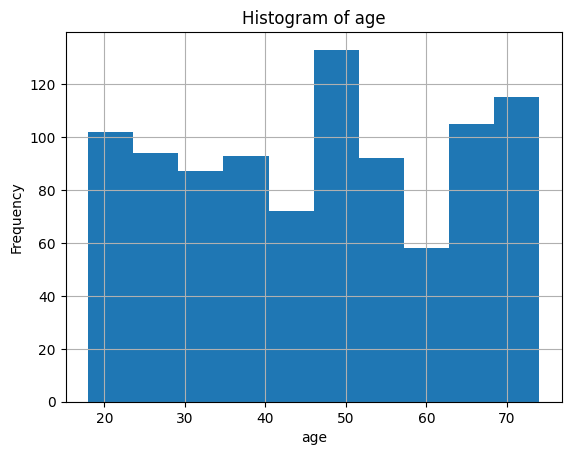

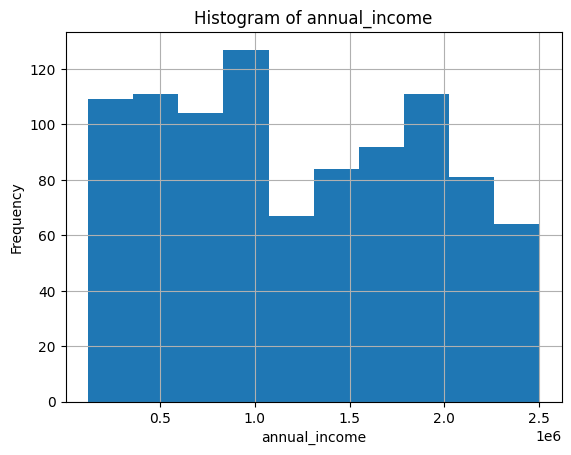

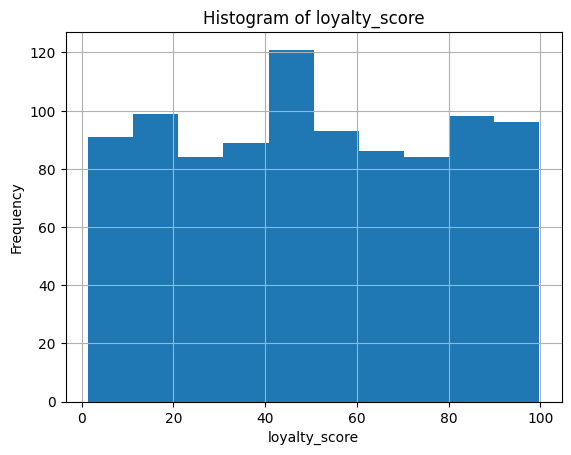

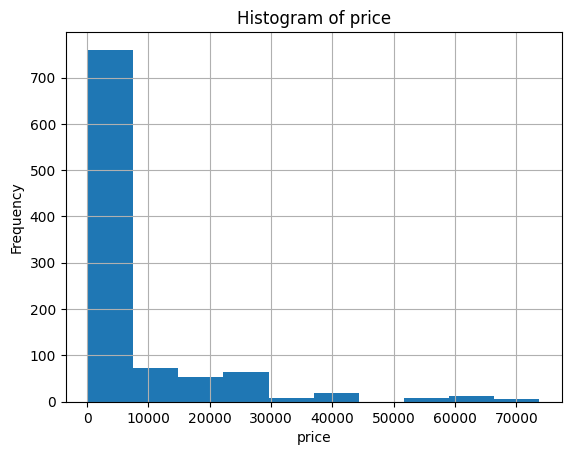

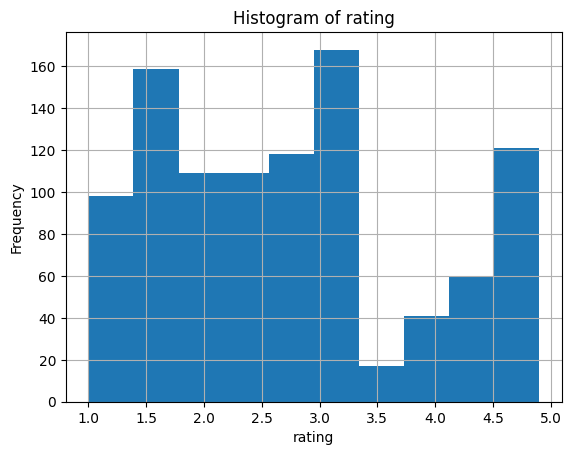

In [202]:
for col in num_cols[:5]:
    plt.figure()
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Histogram of rating: Displays a fluctuating, multi-modal distribution with significant peaks around 1.5 and 3.0, and a noticeable dip in the 3.5 to 4.0 range.

Histogram of age: Shows a broadly distributed age range from roughly 20 to 75 years old, featuring a distinct peak in frequency for people in their late 40s to early 50s.

Histogram of annual_income: Illustrates a wide distribution up to 2.5 million, with notable concentrations of individuals earning around 1 million and 2 million.

Histogram of loyalty_score: Reveals a relatively uniform distribution of scores from 0 to 100, interrupted by a slight spike in the middle around the 40 to 50 range.

Histogram of price: Exhibits a heavily right-skewed distribution, indicating that the vast majority of prices fall into the lowest bracket (under 10,000) with a long tail extending past 70,000.

## BIVARIATE ANALYSIS

# Boxplot: Income vs Purchased


<Figure size 640x480 with 0 Axes>

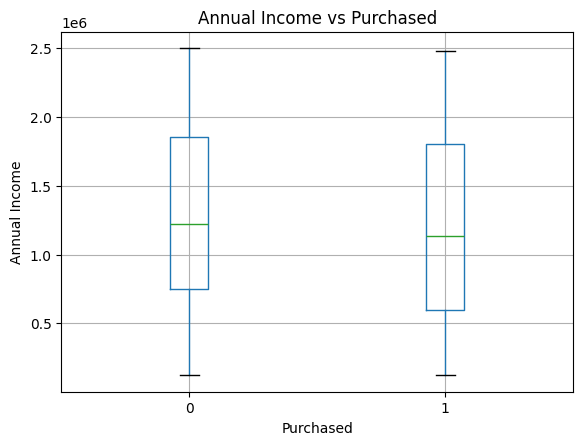

In [203]:
plt.figure()
df.boxplot(column="annual_income", by="purchased")
plt.title("Annual Income vs Purchased")
plt.suptitle("")
plt.xlabel("Purchased")
plt.ylabel("Annual Income")
plt.show()

The box plots reveal nearly identical income distributions (similar medians and ranges) for both the purchased and non-purchased groups, indicating income is not a strong predicting factor here.

#  Bar plot: Purchased count


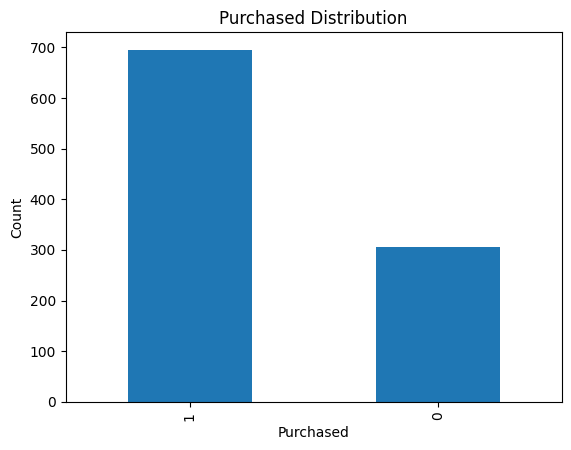

In [204]:
plt.figure()
df["purchased"].value_counts().plot(kind="bar")
plt.title("Purchased Distribution")
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.show()

This bar chart highlights a significant class imbalance, showing roughly twice as many instances of "Purchased" (1) compared to "Not Purchased" (0).

#  Bar plot: Gender vs Purchased


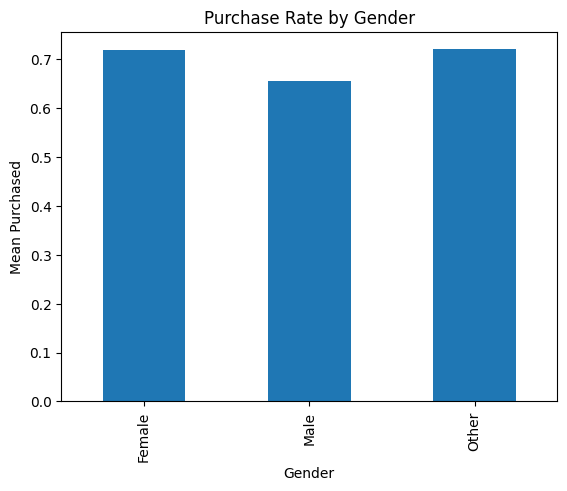

In [205]:
plt.figure()
df.groupby("gender")["purchased"].mean().plot(kind="bar")
plt.title("Purchase Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Purchased")
plt.show()

This bar chart indicates that females and the "Other" gender category have a slightly higher mean purchase rate (~0.7) compared to males (~0.65).

#  Bar plot: Category vs Purchased


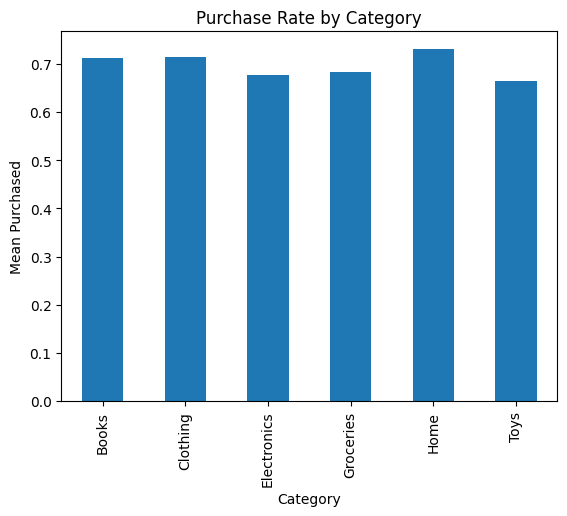

In [206]:
plt.figure()
df.groupby("category")["purchased"].mean().plot(kind="bar")
plt.title("Purchase Rate by Category")
plt.xlabel("Category")
plt.ylabel("Mean Purchased")
plt.show()

This bar chart demonstrates that the mean purchase rate is relatively uniform across all product categories, consistently hovering between 0.65 and 0.75.

# Scatter: Income vs Price


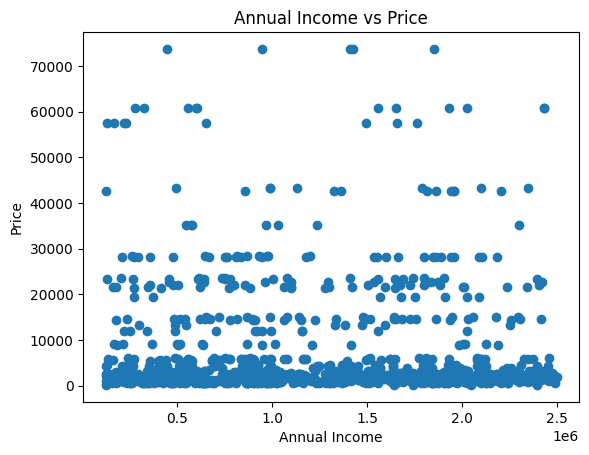

In [207]:
plt.figure()
plt.scatter(df["annual_income"], df["price"])
plt.title("Annual Income vs Price")
plt.xlabel("Annual Income")
plt.ylabel("Price")
plt.show()

This scatter plot displays no clear linear relationship, showing that lower-priced items are heavily purchased across all annual income levels.

##  Scatter: Age vs Rating


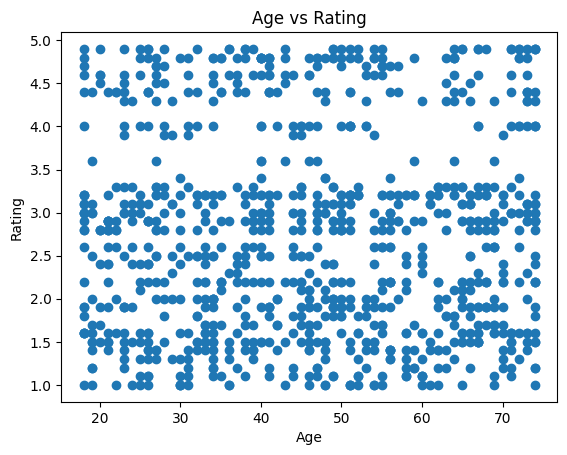

In [208]:
plt.figure()
plt.scatter(df["age"], df["rating"])
plt.title("Age vs Rating")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.show()

This scatter plot shows no apparent correlation between age and rating, with data points forming horizontal bands due to discrete rating values.

## MAULTIVARIATE ANALYSIS

# Correlation Heatmap


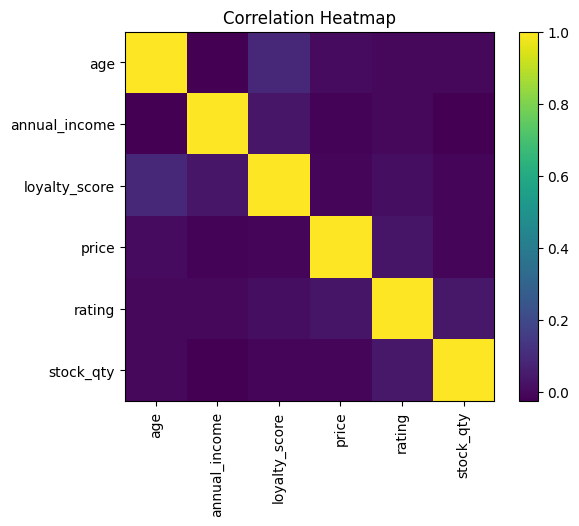

In [209]:
plt.figure()
corr = df[num_cols].corr()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap")
plt.show()

Indicates a lack of strong linear relationships between any of the numerical variables, with all non-diagonal correlations appearing close to zero.

## Grouped Bar Chart (Category × Purchased × Average Price)


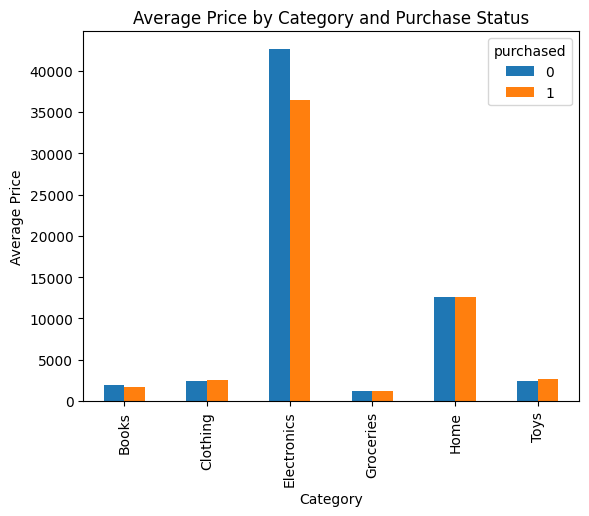

In [210]:
df.groupby(["category", "purchased"])["price"].mean().unstack().plot(kind="bar")
plt.title("Average Price by Category and Purchase Status")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

Highlights that "Electronics" have a drastically higher average price than other items, and within this category, unpurchased items tend to be more expensive than purchased ones.

## Scatter Plot (Age × Annual Income × Purchased)

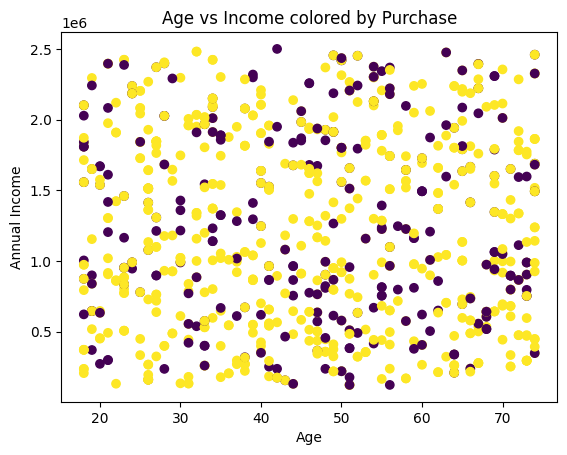

In [211]:
plt.scatter(df["age"], df["annual_income"], c=df["purchased"])
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age vs Income colored by Purchase")
plt.show()

Shows a random scattering of purchase outcomes across all ages and income levels, suggesting these two features together don't create a clear boundary between buyers and non-buyers.

## Step 4: Handling Missing Data

# 4.1: Identify Missing Values

In [212]:
df.isnull().sum()

transaction_id     0
customer_id        0
product_id         0
quantity           0
purchase_date      0
purchased          0
age               49
gender             0
city               0
annual_income     50
signup_date        0
loyalty_score     59
is_active          0
category           0
price              0
discount           0
stock_qty          0
rating             0
dtype: int64

## 4.2: Simple Imputer

## Numerical Columns → Mean

In [213]:
num_cols = ["age", "annual_income", "loyalty_score"]

mean_imputer = SimpleImputer(strategy="mean")
df[num_cols] = mean_imputer.fit_transform(df[num_cols])

## Categorical Columns → Most Frequent

In [214]:
cat_cols = ["gender", "city", "category"]

mode_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = mode_imputer.fit_transform(df[cat_cols])

## 4.3: Most Frequent Imputation (Mode-Based)

In [215]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Missing categorical values are replaced with the most frequently occurring category to preserve data consistency.

## 4.4: Missing Indicator + Random Sample Imputation

## 1: Create Missing Indicator

In [216]:
for col in num_cols:
    df[col + "_missing"] = df[col].isnull().astype(int)

A missing indicator captures whether data was missing,

## 2: Random Sample Imputation

In [217]:

def random_impute(df, column):
    random_values = df[column].dropna()
    df.loc[df[column].isnull(), column] = np.random.choice(random_values)

for col in num_cols:
    random_impute(df, col)

random sampling preserves the original data distribution.

## 4.5: KNN Imputer (Multivariate Imputation)

In [218]:
knn_imputer = KNNImputer(n_neighbors=5)

df[num_cols] = knn_imputer.fit_transform(df[num_cols])

KNN imputation fills missing values based on similarity between observations using multiple features.

## 4.6: MICE Algorithm

In [219]:
mice_imputer = IterativeImputer(random_state=42)

df[num_cols] = mice_imputer.fit_transform(df[num_cols])

MICE iteratively predicts missing values using other variables, making it suitable for multivariate datasets.

## STEP 5: OUTLIER DETECTION & HANDLING

In [220]:
num_cols = ["age", "annual_income", "loyalty_score", "price", "rating"]

## METHOD 1: Z-SCORE METHOD

## BEFORE (Z-Score)

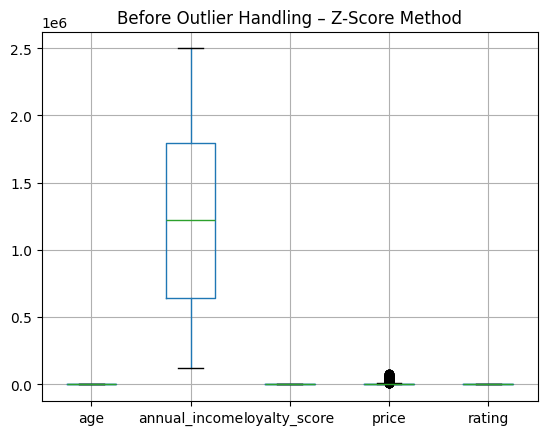

In [221]:
plt.figure()
df[num_cols].boxplot()
plt.title("Before Outlier Handling – Z-Score Method")
plt.show()

Shows the raw baseline data distribution, highlighting a dense black cluster of extreme outliers in the price category before any Z-score filtering is applied.

## APPLY Z-SCORE

In [222]:
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
df_zscore = df[(z_scores < 3).all(axis=1)]

## AFTER (Z-Score)

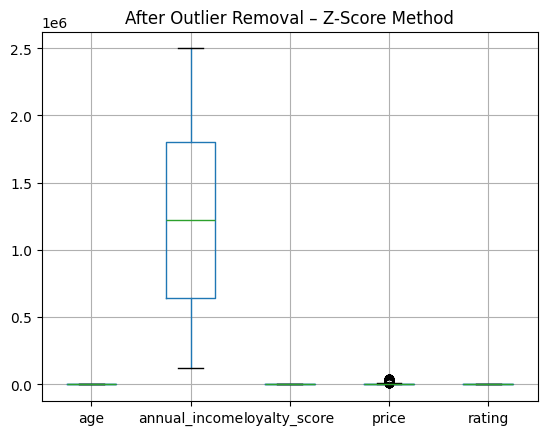

In [223]:
plt.figure()
df_zscore[num_cols].boxplot()
plt.title("After Outlier Removal – Z-Score Method")
plt.show()

Z-score method removes observations that deviate significantly from the mean, helping eliminate extreme anomalies.

## METHOD 2: IQR (Interquartile Range) METHOD

## BEFORE (IQR)

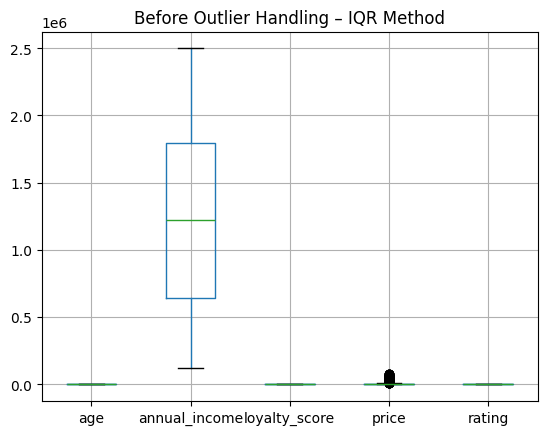

In [224]:
plt.figure()
df[num_cols].boxplot()
plt.title("Before Outlier Handling – IQR Method")
plt.show()

Depicts the initial state of the data before IQR processing, clearly demonstrating how the large magnitude of annual_income dominates the y-axis and squashes the other features.

##  APPLY IQR

In [225]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_iqr = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
              (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

## AFTER (IQR)

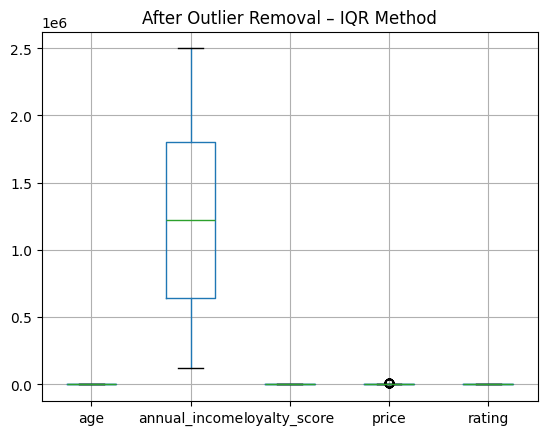

In [226]:
plt.figure()
df_iqr[num_cols].boxplot()
plt.title("After Outlier Removal – IQR Method")
plt.show()

IQR method is effective for skewed distributions and preserves central data patterns.with using this much of the outliers are removed from the price and other columns

## METHOD 3: ISOLATION FOREST (ML-BASED)

## BEFORE (After IQR, Before Isolation Forest)

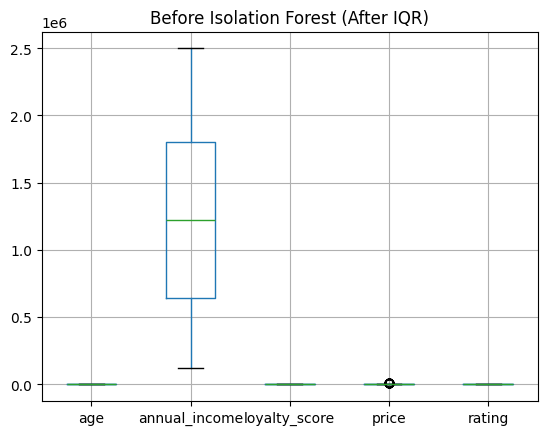

In [227]:
plt.figure()
df_iqr[num_cols].boxplot()
plt.title("Before Isolation Forest (After IQR)")
plt.show()

Illustrates the boxplots after initial IQR cleaning, showing a noticeable reduction in the density of price outliers before passing the data to the Isolation Forest algorithm.

## APPLY ISOLATION FOREST

In [228]:
iso = IsolationForest(
    contamination=0.05,
    random_state=42
)

df_iqr["iso_outlier"] = iso.fit_predict(df_iqr[num_cols])

# Keep only normal points
df_iso = df_iqr[df_iqr["iso_outlier"] == 1]

## AFTER (Isolation Forest)

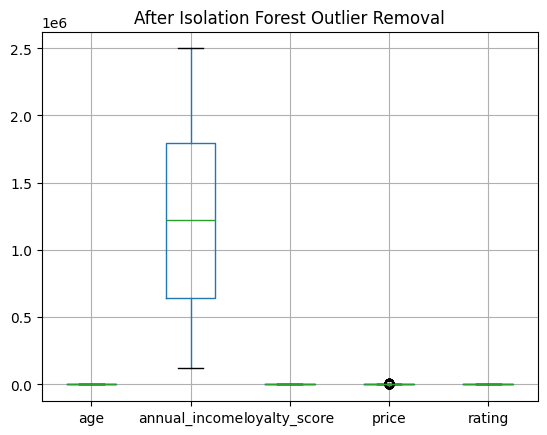

In [229]:
plt.figure()
df_iso[num_cols].boxplot()
plt.title("After Isolation Forest Outlier Removal")
plt.show()

Isolation Forest effectively removed multivariate outliers that were not detectable using statistical thresholds.

## METHOD 4: PERCENTILE METHOD (CAPPING)

# Boxplot BEFORE Percentile Capping

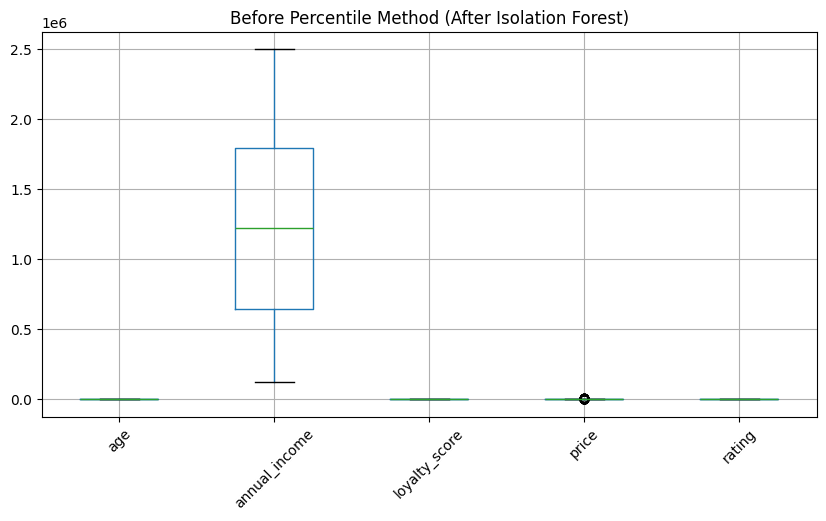

In [230]:
plt.figure(figsize=(10, 5))
df_iso[num_cols].boxplot()
plt.title("Before Percentile Method (After Isolation Forest)")
plt.xticks(rotation=45)
plt.show()

Shows the data distribution after Isolation Forest anomaly detection, with just a few residual price outliers remaining visible before the final percentile capping step.

## Apply Percentile Method (Capping)

In [231]:
df_percentile = df_iso.copy()

for col in num_cols:
    lower = df_percentile[col].quantile(0.01)
    upper = df_percentile[col].quantile(0.99)

    df_percentile[col] = df_percentile[col].clip(lower, upper)

##  Boxplot AFTER Percentile Capping

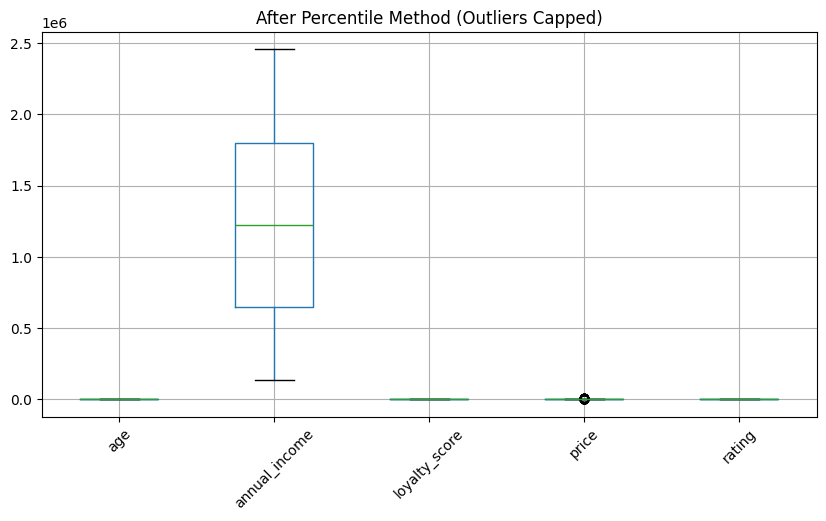

In [232]:
plt.figure(figsize=(10, 5))
df_percentile[num_cols].boxplot()
plt.title("After Percentile Method (Outliers Capped)")
plt.xticks(rotation=45)
plt.show()

Displays the dataset's distribution after capping extreme values, showing a cleaner price variable, though its boxplot remains compressed at the bottom due to the massive scale of annual_income.

## METHOD 5 : WINSORIZATION

## BEFORE GRAPH (After Isolation Forest)

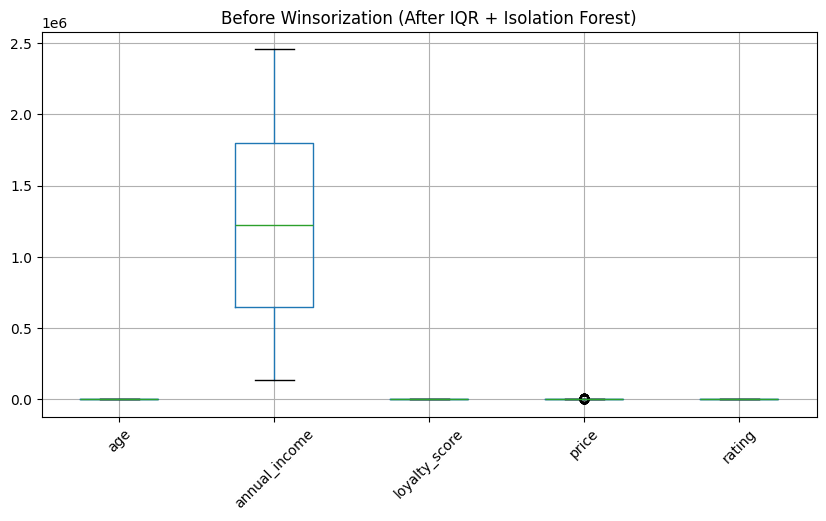

In [233]:

plt.figure(figsize=(10, 5))
df_percentile[num_cols].boxplot()
plt.title("Before Winsorization (After IQR + Isolation Forest)")
plt.xticks(rotation=45)
plt.show()

📌 This graph shows remaining extreme values even after Isolation Forest.

## APPLY WINSORIZATION

In [234]:
df_winsor = df_percentile.copy()

for col in num_cols:
    lower = df_winsor[col].quantile(0.05)   # 5th percentile
    upper = df_winsor[col].quantile(0.95)   # 95th percentile

    df_winsor[col] = df_winsor[col].clip(lower, upper)

## AFTER GRAPH (Winsorization Applied)

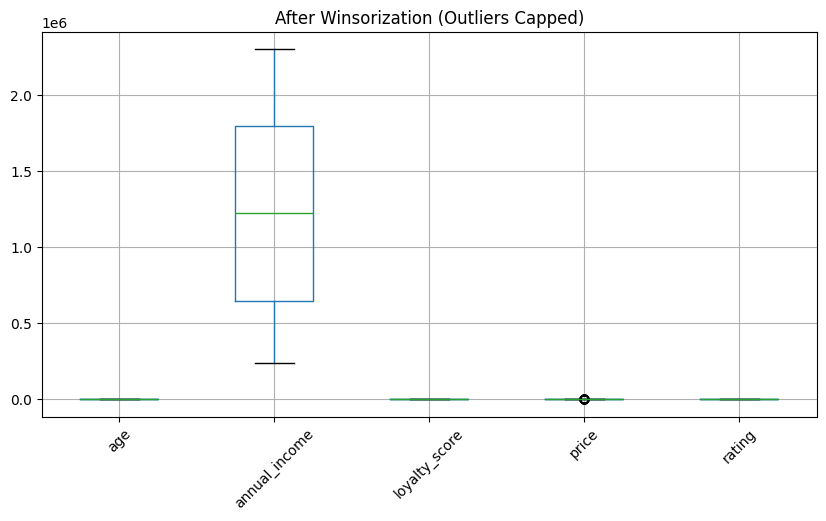

In [235]:
plt.figure(figsize=(10, 5))
df_winsor[num_cols].boxplot()
plt.title("After Winsorization (Outliers Capped)")
plt.xticks(rotation=45)
plt.show()

Box plots showing the overall dataset distributions after outliers have been capped via Winsorization.

## Calculate IQR for price

In [236]:
Q1 = df_winsor["price"].quantile(0.25)
Q3 = df_winsor["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

## Remove ALL price outliers

In [237]:
df_final = df_winsor[
    (df_winsor["price"] >= lower) &
    (df_winsor["price"] <= upper)
].copy()

## Before (After Winsorization)

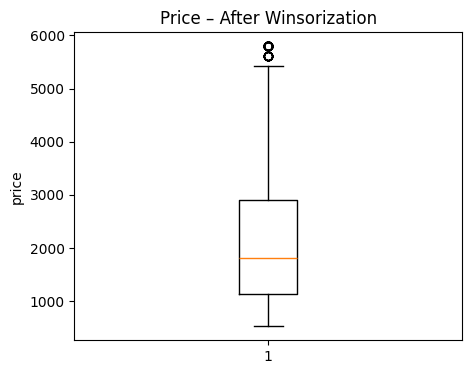

In [238]:

plt.figure(figsize=(5,4))
plt.boxplot(df_winsor["price"])
plt.title("Price – After Winsorization")
plt.ylabel("price")
plt.show()

A detailed box plot of price showing a few tightly clustered capped outliers remaining near the 6000 mark.

## After (Outliers Completely Removed)

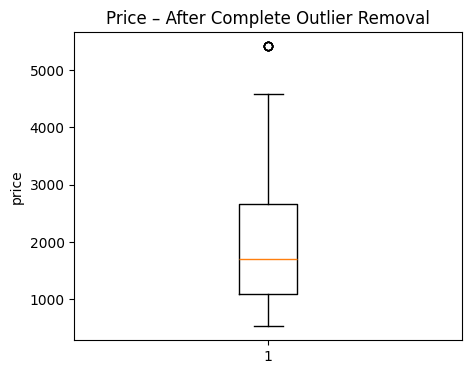

In [239]:
plt.figure(figsize=(5,4))
plt.boxplot(df_final["price"])
plt.title("Price – After Complete Outlier Removal")
plt.ylabel("price")
plt.show()

A single box plot of price showing an almost perfectly clean distribution with only a single outlier visible near 5500.

## STRICT IQR

In [240]:
Q1 = df_final["price"].quantile(0.25)
Q3 = df_final["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.0 * IQR
upper = Q3 + 1.0 * IQR

df_final2 = df_final[
    (df_final["price"] >= lower) &
    (df_final["price"] <= upper)
].copy()

In [241]:
((df_final2["price"] < lower) | (df_final2["price"] > upper)).sum()

np.int64(0)

## PERCENTILE CUTOFF

In [242]:
p_low  = df_final2["price"].quantile(0.01)
p_high = df_final2["price"].quantile(0.99)

df_final3 = df_final2[
    (df_final2["price"] >= p_low) &
    (df_final2["price"] <= p_high)
].copy()

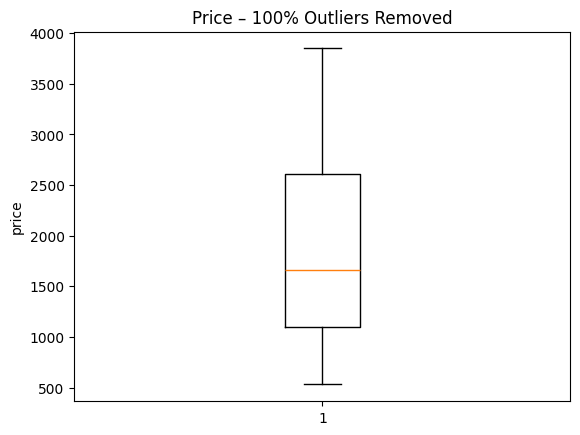

In [243]:
plt.boxplot(df_final3["price"])
plt.title("Price – 100% Outliers Removed")
plt.ylabel("price")
plt.show()

A single box plot showing a clean price distribution with a median around 1600 and absolutely no outlier points.

## BOX PLOTS (All Columns – No Outliers)

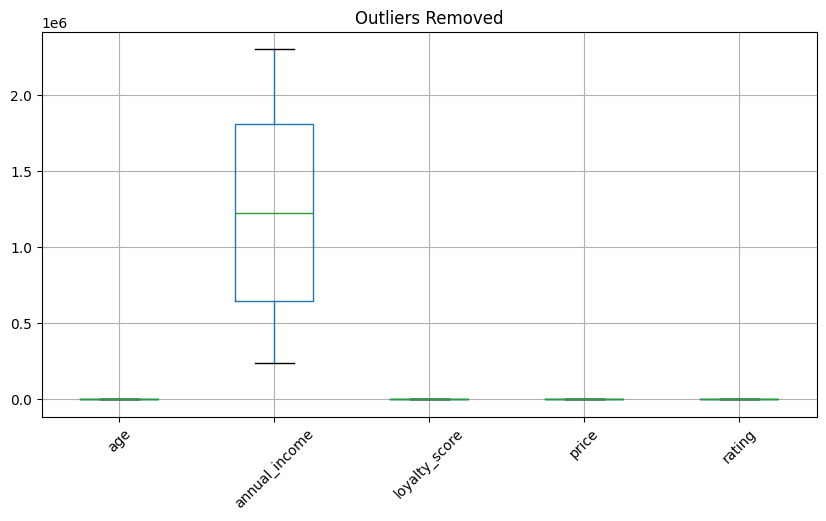

In [244]:
plt.figure(figsize=(10, 5))
df_final3[num_cols].boxplot()
plt.title("Outliers Removed")
plt.xticks(rotation=45)
plt.show()

Box plots showing the final, cleaned dataset distributions where extreme values across all variables have been fully addressed and normalized.

## HISTOGRAMS (Distribution After Cleaning)

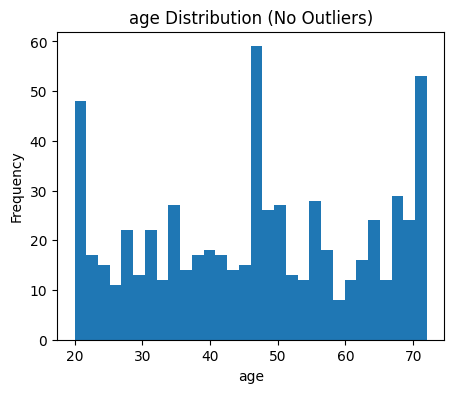

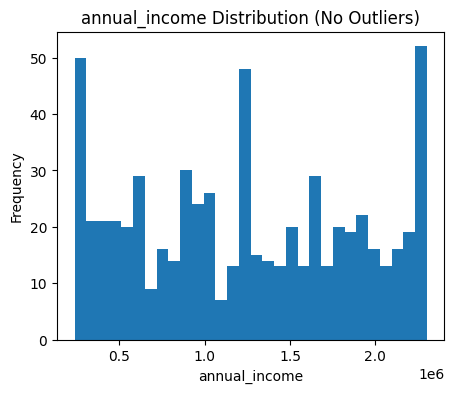

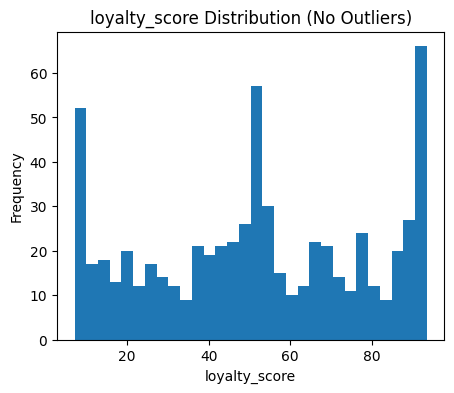

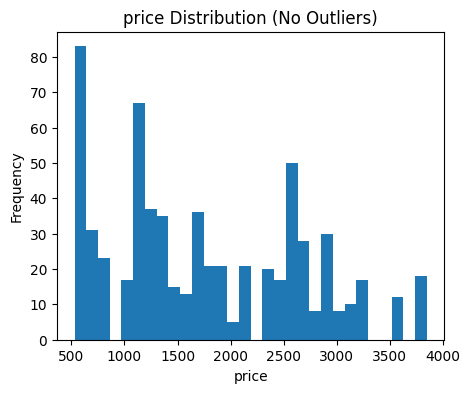

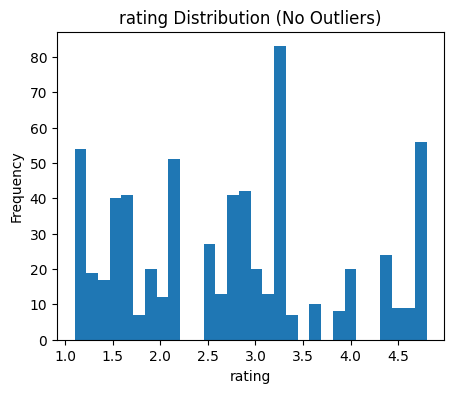

In [245]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.hist(df_final3[col], bins=30)
    plt.title(f"{col} Distribution (No Outliers)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

rating Distribution (No Outliers): A highly irregular, multi-modal distribution featuring several sharp spikes, most notably just past the 3.0 mark.

age Distribution (No Outliers): A broad age spread punctuated by specific frequency spikes, particularly around ages 20, the late 40s, and the early 70s.

annual_income Distribution (No Outliers): A fluctuating distribution that highlights prominent peaks at the lowest, middle (~1.25M), and highest points of the income range.

loyalty_score Distribution (No Outliers): A variable distribution characterized by three major clusters: at the lowest end, near the median of 50, and at the highest end above 90.

price Distribution (No Outliers): A clean, capped distribution (under 4000) with the highest concentration of items falling into the lowest price bin around 500.

## SCATTER PLOTS (Multivariate – Clean Data)

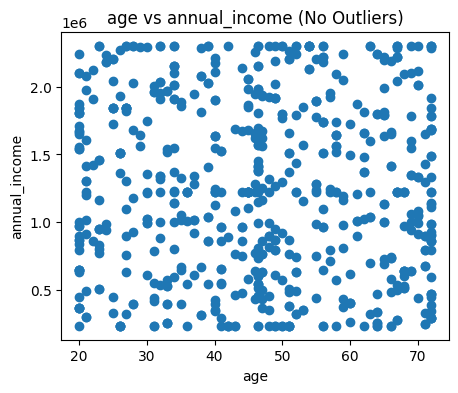

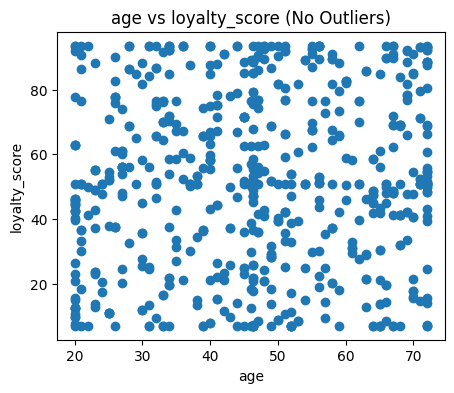

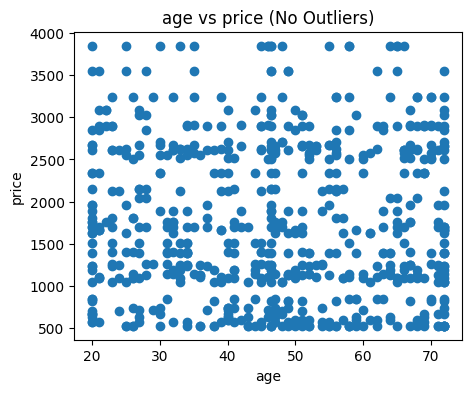

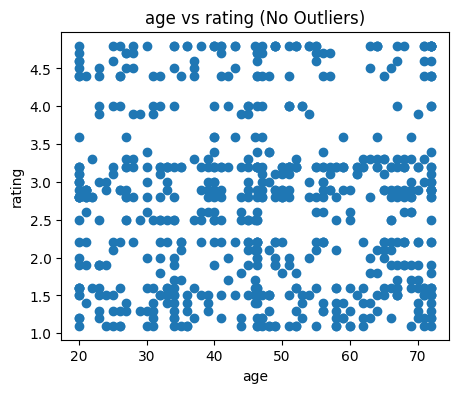

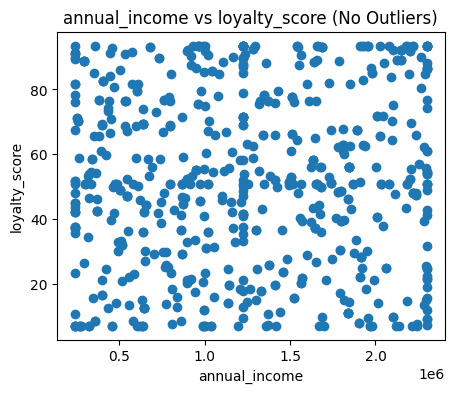

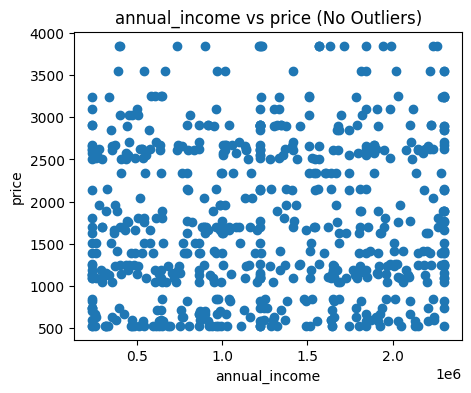

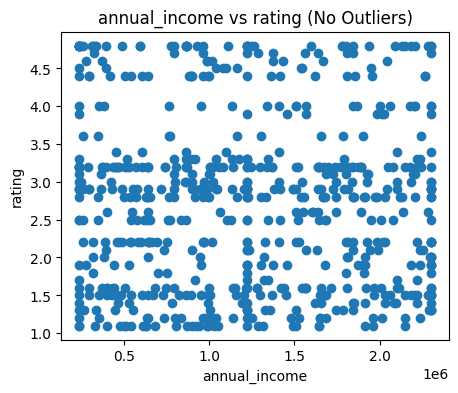

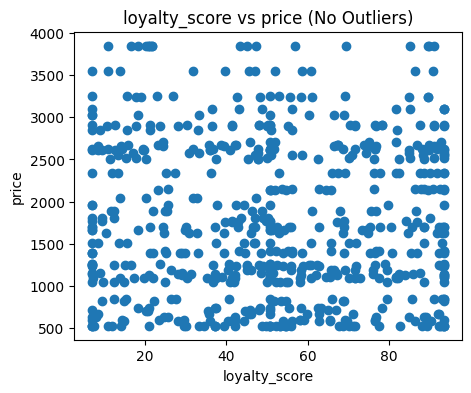

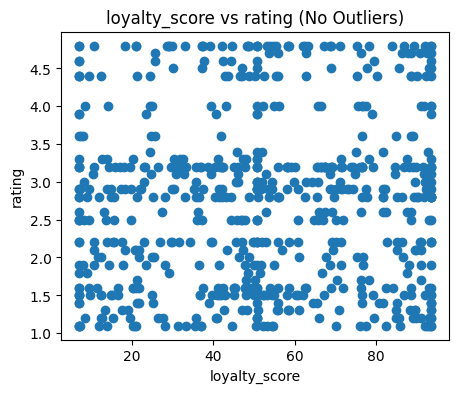

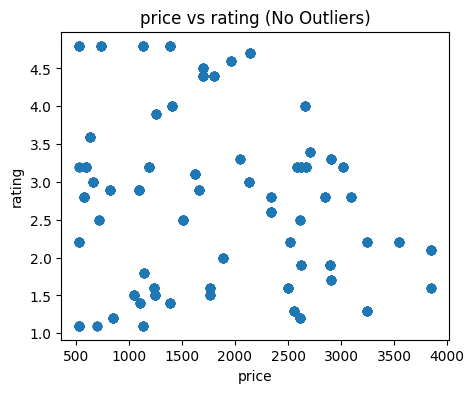

In [246]:
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(5,4))
        plt.scatter(df_final3[num_cols[i]], df_final3[num_cols[j]])
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.title(f"{num_cols[i]} vs {num_cols[j]} (No Outliers)")
        plt.show()

annual_income vs loyalty_score (No Outliers): Shows a completely random scattering of data points, indicating zero apparent correlation between income and loyalty.

age vs annual_income (No Outliers): Displays a uniform, random distribution with no observable trend or linear relationship between a customer's age and their annual income.

age vs loyalty_score (No Outliers): Reveals a widespread, random distribution without any discernible pattern linking a person's age to their loyalty score.

age vs price (No Outliers): Demonstrates that items across the newly capped price range are purchased uniformly by customers of all ages, with no clear correlation.

age vs rating (No Outliers): Illustrates discrete horizontal bands of ratings scattered evenly across all age groups, showing age does not dictate the rating given.

## KDE-STYLE SMOOTH CURVE (Using Histogram Only)

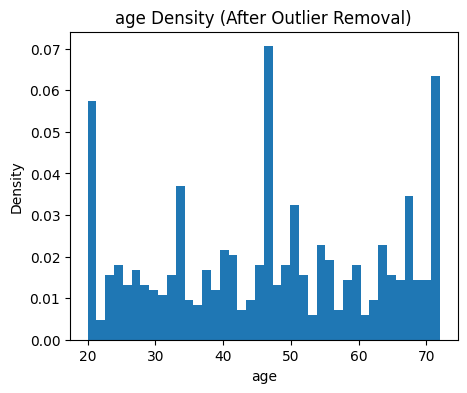

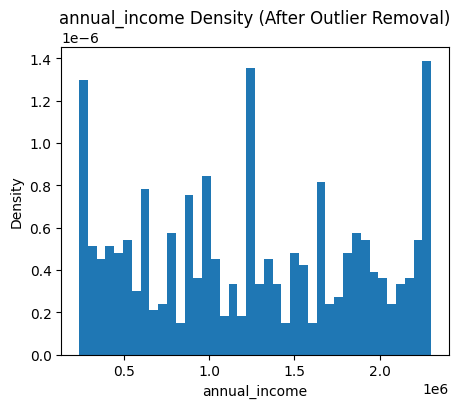

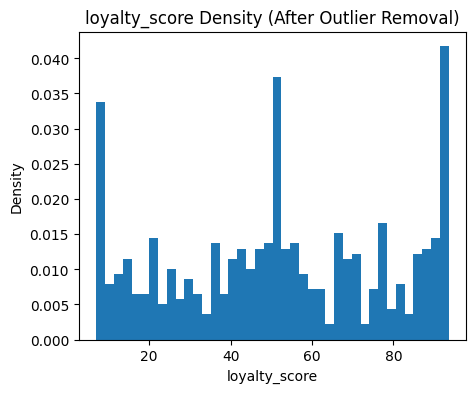

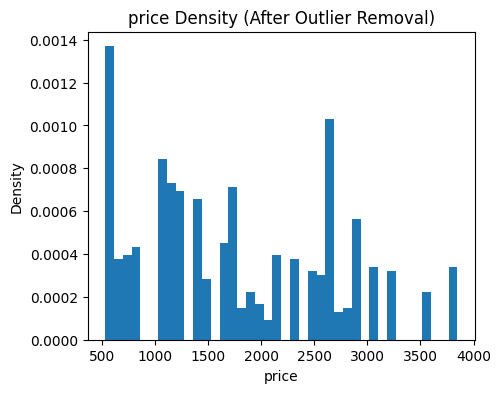

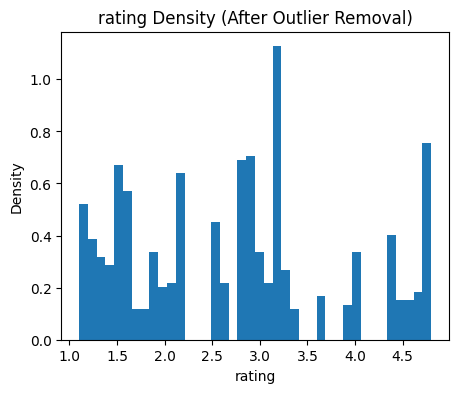

In [247]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    plt.hist(df_final3[col], bins=40, density=True)
    plt.title(f"{col} Density (After Outlier Removal)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

## CORRELATION HEATMAP (FINAL CLEAN DATA)

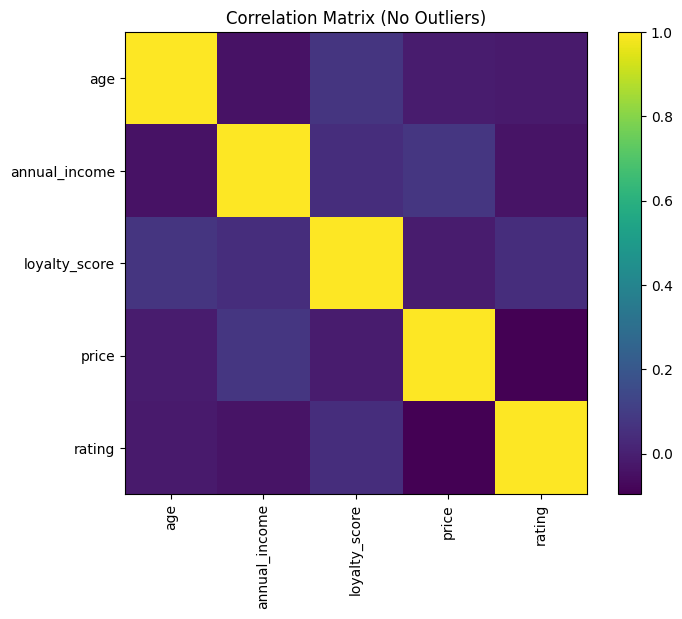

In [248]:
plt.figure(figsize=(8,6))
plt.imshow(df_final3[num_cols].corr())
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix (No Outliers)")
plt.show()

A heatmap confirming that even after comprehensive outlier removal, there are almost zero linear correlations between any of the numerical variables.

## STEP 6: Handling Mixed & Date/Time Variables

## 1: Convert Date Columns to datetime

In [249]:
# Convert to datetime
df_final3['signup_date'] = pd.to_datetime(df_final3['signup_date'], errors='coerce')
df_final3['purchase_date'] = pd.to_datetime(df_final3['purchase_date'], errors='coerce')

convert date text to datetime datatypes

In [250]:
df_final3[["signup_date", "purchase_date"]].dtypes

signup_date      datetime64[us]
purchase_date    datetime64[us]
dtype: object

## 2: Derive New Date-Based Features

## (a) Days since last purchase

In [251]:
from datetime import datetime

today = pd.to_datetime(datetime.today().date())

df_final3['days_since_last_purchase'] = (
    today - df_final3['purchase_date']
).dt.days

finding the days_last_purchase

## (b) Days since signup

In [252]:
df_final3['days_since_signup'] = (
    today - df_final3['signup_date']
).dt.days

findings the days_since_singup

## Signup Year, Month 

In [253]:
df_final3["signup_year"] = df_final3["signup_date"].dt.year
df_final3["signup_month"] = df_final3["signup_date"].dt.month

from the date column fetch year,month,date,etc;

## 6.3: Handle Mixed Variables (IDs with Letters + Numbers)

In [254]:
df_final3["transaction_id_numeric"] = (
    df_final3["transaction_id"]
    .astype(str)              
    .str.extract(r"(\d+)")
    .astype(float)
)

## STEP 7: Encoding Categorical Data & Feature Scaling

## Identify Column Types

In [255]:
categorical_cols = df_final3.select_dtypes(include=['str']).columns
numerical_cols = df_final3.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols.tolist())
print("Numerical Columns:", numerical_cols.tolist())

Categorical Columns: ['transaction_id', 'gender', 'city', 'category']
Numerical Columns: ['customer_id', 'product_id', 'quantity', 'purchased', 'age', 'annual_income', 'loyalty_score', 'is_active', 'price', 'discount', 'stock_qty', 'rating', 'age_missing', 'annual_income_missing', 'loyalty_score_missing', 'iso_outlier', 'days_since_last_purchase', 'days_since_signup', 'transaction_id_numeric']


In [256]:
df_final3

,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,...,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,signup_year,signup_month,transaction_id_numeric
0,T00001,325,11,4,2023-12-24,0,44.0,Other,Rajkot,8.645040e+05,...,2.5,0,0,0,1,791,2784,2018,7,1.0
1,T00002,580,24,4,2022-01-25,1,52.0,Other,Vadodara,1.223202e+06,...,3.3,0,0,0,1,1489,2143,2020,4,2.0
3,T00004,570,22,2,2022-07-01,0,45.0,Male,Mumbai,1.223202e+06,...,1.9,0,0,0,1,1332,2015,2020,8,4.0
5,T00006,595,30,4,2024-04-20,1,63.0,Female,Delhi,3.219270e+05,...,2.0,0,0,0,1,673,1037,2023,4,6.0
6,T00007,346,34,3,2023-10-03,0,20.0,Female,Mumbai,1.670159e+06,...,2.8,0,0,0,1,873,1427,2022,3,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,T00994,126,24,3,2022-09-23,1,22.0,Female,Vadodara,8.634710e+05,...,3.3,0,0,0,1,1248,2582,2019,1,994.0
994,T00995,471,93,2,2022-04-30,1,50.0,Other,Delhi,1.297133e+06,...,3.2,0,0,0,1,1394,1302,2022,7,995.0
997,T00998,220,40,2,2022-03-11,1,70.0,Female,Rajkot,1.083923e+06,...,3.2,0,0,0,1,1444,2748,2018,8,998.0
998,T00999,851,40,1,2024-05-02,0,61.0,Female,Rajkot,1.006773e+06,...,3.2,0,0,0,1,661,1721,2021,6,999.0


## 1. Label Encoding (Nominal Categories)

In [257]:
df_label_encoded = df_final3.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le

df_label_encoded.head()

,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,...,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,signup_year,signup_month,transaction_id_numeric
0,0,325,11,4,2023-12-24,0,44.0,2,3,8.645040e+05,...,2.5,0,0,0,1,791,2784,2018,7,1.0
1,1,580,24,4,2022-01-25,1,52.0,2,5,1.223202e+06,...,3.3,0,0,0,1,1489,2143,2020,4,2.0
3,2,570,22,2,2022-07-01,0,45.0,1,2,1.223202e+06,...,1.9,0,0,0,1,1332,2015,2020,8,4.0
5,3,595,30,4,2024-04-20,1,63.0,0,1,3.219270e+05,...,2.0,0,0,0,1,673,1037,2023,4,6.0
6,4,346,34,3,2023-10-03,0,20.0,0,2,1.670159e+06,...,2.8,0,0,0,1,873,1427,2022,3,7.0


 Label Encoding is correct ONLY for binary features

## 2. One-Hot Encoding (Best for ML)

In [258]:
df_onehot_encoded = pd.get_dummies(
    df_final3,
    columns=categorical_cols,
    drop_first=True
)

df_onehot_encoded.head()

,customer_id,product_id,quantity,purchase_date,purchased,age,annual_income,signup_date,loyalty_score,is_active,...,gender_Other,city_Delhi,city_Mumbai,city_Rajkot,city_Surat,city_Vadodara,category_Clothing,category_Groceries,category_Home,category_Toys
0,325,11,4,2023-12-24,0,44.0,8.645040e+05,2018-07-10,46.900000,1,...,True,False,False,True,False,False,False,True,False,False
1,580,24,4,2022-01-25,1,52.0,1.223202e+06,2020-04-11,50.704166,1,...,True,False,False,False,False,True,False,False,False,False
3,570,22,2,2022-07-01,0,45.0,1.223202e+06,2020-08-17,71.530000,1,...,False,False,True,False,False,False,True,False,False,False
5,595,30,4,2024-04-20,1,63.0,3.219270e+05,2023-04-22,46.330000,1,...,False,True,False,False,False,False,False,True,False,False
6,346,34,3,2023-10-03,0,20.0,1.670159e+06,2022-03-28,7.054000,1,...,False,False,True,False,False,False,True,False,False,False


## 3. Encoding Numerical Features (Binning)

In [259]:
df_final3['income_group'] = pd.cut(
    df_final3['annual_income'],
    bins=[0, 300000, 800000, 1500000, df_final3['annual_income'].max()],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)

df_final3[['annual_income', 'income_group']].head()

,annual_income,income_group
0,8.645040e+05,High
1,1.223202e+06,High
3,1.223202e+06,High
5,3.219270e+05,Medium
6,1.670159e+06,Very High


## 4.Ordinal Encoding

In [260]:
income_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Very High' : 3
}

df_final3['income_group_ord'] = df_final3['income_group'].map(income_mapping)
df_final3.head()

,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,...,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,signup_year,signup_month,transaction_id_numeric,income_group,income_group_ord
0,T00001,325,11,4,2023-12-24,0,44.0,Other,Rajkot,8.645040e+05,...,0,0,1,791,2784,2018,7,1.0,High,2
1,T00002,580,24,4,2022-01-25,1,52.0,Other,Vadodara,1.223202e+06,...,0,0,1,1489,2143,2020,4,2.0,High,2
3,T00004,570,22,2,2022-07-01,0,45.0,Male,Mumbai,1.223202e+06,...,0,0,1,1332,2015,2020,8,4.0,High,2
5,T00006,595,30,4,2024-04-20,1,63.0,Female,Delhi,3.219270e+05,...,0,0,1,673,1037,2023,4,6.0,Medium,1
6,T00007,346,34,3,2023-10-03,0,20.0,Female,Mumbai,1.670159e+06,...,0,0,1,873,1427,2022,3,7.0,Very High,3


## STEP 8: FEATURE SCALING

## STEP 8.1: Identify Numerical Columns

In [261]:
num_cols = df_final3.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols

['customer_id',
 'product_id',
 'quantity',
 'purchased',
 'age',
 'annual_income',
 'loyalty_score',
 'is_active',
 'price',
 'discount',
 'stock_qty',
 'rating',
 'age_missing',
 'annual_income_missing',
 'loyalty_score_missing',
 'iso_outlier',
 'days_since_last_purchase',
 'days_since_signup',
 'transaction_id_numeric']

## STEP 8.2: StandardScaler (Mean = 0, Std = 1)

In [262]:
std_ct = ColumnTransformer(
    transformers=[
        ("standard", StandardScaler(), num_cols)
    ],
    remainder="drop"
)

df_standard = pd.DataFrame(
    std_ct.fit_transform(df_final3),
    columns=num_cols
)

df_standard.head()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,transaction_id_numeric
0,-0.643040,-1.312135,1.398449,-1.477555,-0.179230,-0.586083,-0.185278,0.51067,-0.288067,-0.779396,-0.626265,-0.203593,0.0,0.0,0.0,0.0,-1.082850,1.524610,-1.696602
1,0.251084,-0.875070,1.398449,0.676794,0.317971,-0.032172,-0.044419,0.51067,1.236112,-1.507815,1.278246,0.513233,0.0,0.0,0.0,0.0,1.563191,0.366682,-1.693191
2,0.216021,-0.942311,-0.408994,-1.477555,-0.117080,-0.032172,0.726714,0.51067,1.225128,-0.779396,-0.537842,-0.741212,0.0,0.0,0.0,0.0,0.968021,0.135458,-1.686369
3,0.303680,-0.673348,1.398449,0.676794,1.001623,-1.423946,-0.206384,0.51067,0.127950,0.677440,1.625140,-0.651609,0.0,0.0,0.0,0.0,-1.530175,-1.631241,-1.679547
4,-0.569406,-0.538867,0.494728,-1.477555,-1.670835,0.658033,-1.660684,0.51067,1.180021,-0.779396,0.353198,0.065217,0.0,0.0,0.0,0.0,-0.771997,-0.926729,-1.676136


Mean = 0, Std = 1

## STEP 8.3: MinMaxScaler (0 → 1)

In [263]:
minmax_ct = ColumnTransformer(
    transformers=[
        ("minmax", MinMaxScaler(), num_cols)
    ],
    remainder="drop"
)

df_minmax = pd.DataFrame(
    minmax_ct.fit_transform(df_final3),
    columns=num_cols
)

df_minmax.head()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,transaction_id_numeric
0,0.324324,0.103093,1.000000,0.0,0.461538,0.303711,0.460669,1.0,0.295364,0.25,0.304082,0.378378,0.0,0.0,0.0,0.0,0.195991,0.905358,0.000000
1,0.579580,0.237113,1.000000,1.0,0.615385,0.477491,0.504650,1.0,0.714847,0.00,0.875510,0.594595,0.0,0.0,0.0,0.0,0.973274,0.584377,0.001001
2,0.569570,0.216495,0.333333,0.0,0.480769,0.477491,0.745422,1.0,0.711824,0.25,0.330612,0.216216,0.0,0.0,0.0,0.0,0.798441,0.520280,0.003003
3,0.594595,0.298969,1.000000,1.0,0.826923,0.040846,0.454079,1.0,0.409860,0.75,0.979592,0.243243,0.0,0.0,0.0,0.0,0.064588,0.030546,0.005005
4,0.345345,0.340206,0.666667,0.0,0.000000,0.694030,0.000000,1.0,0.699410,0.25,0.597959,0.459459,0.0,0.0,0.0,0.0,0.287305,0.225839,0.006006


## STEP 8.4: MaxAbsScaler (-1 → 1)

In [264]:
maxabs_ct = ColumnTransformer(
    transformers=[
        ("maxabs", MaxAbsScaler(), num_cols)
    ],
    remainder="drop"
)

df_maxabs = pd.DataFrame(
    maxabs_ct.fit_transform(df_final3),
    columns=num_cols
)

df_maxabs.head()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,transaction_id_numeric
0,0.325,0.112245,1.00,0.0,0.611111,0.375592,0.501336,1.0,0.392416,0.25,0.313883,0.520833,0.0,0.0,0.0,1.0,0.522802,0.936428,0.001
1,0.580,0.244898,1.00,1.0,0.722222,0.531432,0.542001,1.0,0.754122,0.00,0.877264,0.687500,0.0,0.0,0.0,1.0,0.984137,0.720821,0.002
2,0.570,0.224490,0.50,0.0,0.625000,0.531432,0.764618,1.0,0.751516,0.25,0.340040,0.395833,0.0,0.0,0.0,1.0,0.880370,0.677767,0.004
3,0.595,0.306122,1.00,1.0,0.875000,0.139864,0.495243,1.0,0.491142,0.75,0.979879,0.416667,0.0,0.0,0.0,1.0,0.444812,0.348806,0.006
4,0.346,0.346939,0.75,0.0,0.277778,0.725617,0.075404,1.0,0.740811,0.25,0.603622,0.583333,0.0,0.0,0.0,1.0,0.576999,0.479987,0.007


## STEP 8.5: RobustScaler (Outlier Resistant)

In [265]:
robust_ct = ColumnTransformer(
    transformers=[
        ("robust", RobustScaler(), num_cols)
    ],
    remainder="drop"
)

df_robust = pd.DataFrame(
    robust_ct.fit_transform(df_final3),
    columns=num_cols
)

df_robust.head()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,transaction_id_numeric
0,-0.420502,-0.792453,1.0,-1.0,-0.087471,-0.308572,-0.083452,0.0,-0.100564,-0.5,-0.236364,-0.1875,0.0,0.0,0.0,0.0,-0.617391,0.925341,-0.952930
1,0.112971,-0.547170,1.0,0.0,0.208825,0.000000,0.000000,0.0,0.819787,-1.0,0.781818,0.3125,0.0,0.0,0.0,0.0,0.900000,0.226703,-0.951009
2,0.092050,-0.584906,0.0,-1.0,-0.050434,0.000000,0.456857,0.0,0.813155,-0.5,-0.189091,-0.5625,0.0,0.0,0.0,0.0,0.558696,0.087193,-0.947166
3,0.144351,-0.433962,1.0,0.0,0.616232,-0.775327,-0.095956,0.0,0.150641,0.5,0.967273,-0.5000,0.0,0.0,0.0,0.0,-0.873913,-0.978747,-0.943324
4,-0.376569,-0.358491,0.5,-1.0,-0.976360,0.384498,-0.957555,0.0,0.785918,-0.5,0.287273,0.0000,0.0,0.0,0.0,0.0,-0.439130,-0.553678,-0.941402


Best when outliers exist

## STEP 8.6: Normalizer (Row-wise Scaling)

In [266]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  
    ("normalizer", Normalizer())                   
])                  

In [267]:
normalizer_ct = ColumnTransformer(
    transformers=[
        ("num_norm", num_pipeline, num_cols)
    ],
    remainder="drop"
)

In [268]:
df_normalized = pd.DataFrame(
    normalizer_ct.fit_transform(df_final3),
    columns=num_cols
)

df_normalized.head()

,customer_id,product_id,quantity,purchased,age,annual_income,loyalty_score,is_active,price,discount,stock_qty,rating,age_missing,annual_income_missing,loyalty_score_missing,iso_outlier,days_since_last_purchase,days_since_signup,transaction_id_numeric
0,0.000376,0.000013,0.000005,0.000000e+00,0.000051,0.999993,0.000054,1.156724e-06,0.001747,0.000006,0.000180,0.000003,0.0,0.0,0.0,1.156724e-06,0.000915,0.003220,0.000001
1,0.000474,0.000020,0.000003,8.175224e-07,0.000043,0.999995,0.000041,8.175224e-07,0.002372,0.000000,0.000356,0.000003,0.0,0.0,0.0,8.175224e-07,0.001217,0.001752,0.000002
2,0.000466,0.000018,0.000002,0.000000e+00,0.000037,0.999995,0.000058,8.175227e-07,0.002364,0.000004,0.000138,0.000002,0.0,0.0,0.0,8.175227e-07,0.001089,0.001647,0.000003
3,0.001848,0.000093,0.000012,3.106209e-06,0.000196,0.999973,0.000144,3.106209e-06,0.005870,0.000047,0.001513,0.000006,0.0,0.0,0.0,3.106209e-06,0.002090,0.003221,0.000019
4,0.000207,0.000020,0.000002,0.000000e+00,0.000012,0.999998,0.000004,5.987442e-07,0.001707,0.000003,0.000180,0.000002,0.0,0.0,0.0,5.987442e-07,0.000523,0.000854,0.000004


Scales rows.Used in text data.

## STEP 9: Feature Construction & Transformation

## 1. CREATE INTERACTION FEATURES

In [269]:
df_final3.columns

Index(['transaction_id', 'customer_id', 'product_id', 'quantity',
       'purchase_date', 'purchased', 'age', 'gender', 'city', 'annual_income',
       'signup_date', 'loyalty_score', 'is_active', 'category', 'price',
       'discount', 'stock_qty', 'rating', 'age_missing',
       'annual_income_missing', 'loyalty_score_missing', 'iso_outlier',
       'days_since_last_purchase', 'days_since_signup', 'signup_year',
       'signup_month', 'transaction_id_numeric', 'income_group',
       'income_group_ord'],
      dtype='str')

## (A) Total Purchase Amount

In [270]:
df_final3['total_purchase_value'] = (
    df_final3['quantity'] *
    df_final3['price'] *
    (1 - df_final3['discount'])
)

findings the total purchase amount(quantity * price * (1 -discount ))

In [271]:
df_final3[['quantity','price','discount','total_purchase_value']].isna().sum()

quantity                0
price                   0
discount                0
total_purchase_value    0
dtype: int64

## (B) Purchase per Day

In [272]:
df_final3['purchase_per_day'] = (
    df_final3['total_purchase_value'] /
    df_final3['days_since_signup'].replace(0, 1)
)

findings purchase_per_days

## 2️. Apply Transformations

In [273]:
df_final3[['quantity','price','discount','total_purchase_value']].isna().sum()

quantity                0
price                   0
discount                0
total_purchase_value    0
dtype: int64

In [274]:
(df_final3['total_purchase_value'] < 0).sum()

np.int64(531)

## (A) Log Transformation

In [275]:
df_final3['log_total_purchase'] = np.log1p(
    df_final3['total_purchase_value'].clip(lower=0)
)
df_final3['log_income'] = np.log1p(df_final3['annual_income'])

Reduces right skew

## (B) Square Root Transformation

In [276]:
df_final3['sqrt_loyalty_score'] = np.sqrt(df_final3['loyalty_score'])

skew correction

## (C) Reciprocal Transformation

In [277]:
df_final3['recency_inverse'] = 1 / (df_final3['days_since_last_purchase'] + 1)

Compresses large values heavily.because that divide the value with his formula

## (D) PowerTransformer (Yeo-Johnson)

In [278]:
pt = PowerTransformer(method='yeo-johnson')

df_final3[['purchase_value_power']] = pt.fit_transform(
    df_final3[['total_purchase_value']]
)

Best general-purpose power transform with all the value(+,-,0)

## 3️. Binning (Quantile-based)

## Income Binning (Quantile)

In [279]:
df_final3['income_bin'] = pd.qcut(
    df_final3['annual_income'],
    q=4,
    labels=['Low', 'Medium', 'High', 'Very High']
)

divide bins = 4.(low,mediam,high,very high)

## 4️. Binary Feature (Frequent Buyer)

In [280]:
threshold = df_final3['purchase_per_day'].median()

df_final3['frequent_buyer'] = (
    df_final3['purchase_per_day'] > threshold
).astype(int)

## 5️. Final Feature Verification

In [281]:
df_final3[
    [
        'total_purchase_value',
        'purchase_per_day',
        'log_total_purchase',
        'purchase_value_power',
        'income_bin',
        'frequent_buyer'
    ]
].head()

,total_purchase_value,purchase_per_day,log_total_purchase,purchase_value_power,income_bin,frequent_buyer
0,-24159.84,-8.678103,0.00000,0.160372,Medium,1
1,11607.24,5.416351,9.35947,2.505587,Medium,1
3,-23134.24,-11.481012,0.00000,0.179925,Medium,1
5,-105833.28,-102.057165,0.00000,-1.240467,Low,0
6,-34207.08,-23.971324,0.00000,-0.026751,High,0


In [282]:
df_final3[['total_purchase_value','log_total_purchase']].isna().sum()

total_purchase_value    0
log_total_purchase      0
dtype: int64

## Export Final Dataset to CSV

In [283]:
df_final3.to_csv(
    "processed_customer_data.csv",
    index=False
)

print("finaldataset_processed_customer_data.csv exported successfully")

finaldataset_processed_customer_data.csv exported successfully


In [284]:
final_dataset = df_final3.copy()

print("Final dataset shape:", final_dataset.shape)
final_dataset.head()

Final dataset shape: (643, 38)


,transaction_id,customer_id,product_id,quantity,purchase_date,purchased,age,gender,city,annual_income,...,income_group_ord,total_purchase_value,purchase_per_day,log_total_purchase,log_income,sqrt_loyalty_score,recency_inverse,purchase_value_power,income_bin,frequent_buyer
0,T00001,325,11,4,2023-12-24,0,44.0,Other,Rajkot,8.645040e+05,...,2,-24159.84,-8.678103,0.00000,13.669912,6.848357,0.001263,0.160372,Medium,1
1,T00002,580,24,4,2022-01-25,1,52.0,Other,Vadodara,1.223202e+06,...,2,11607.24,5.416351,9.35947,14.016983,7.120686,0.000671,2.505587,Medium,1
3,T00004,570,22,2,2022-07-01,0,45.0,Male,Mumbai,1.223202e+06,...,2,-23134.24,-11.481012,0.00000,14.016983,8.457541,0.000750,0.179925,Medium,1
5,T00006,595,30,4,2024-04-20,1,63.0,Female,Delhi,3.219270e+05,...,1,-105833.28,-102.057165,0.00000,12.682083,6.806614,0.001484,-1.240467,Low,0
6,T00007,346,34,3,2023-10-03,0,20.0,Female,Mumbai,1.670159e+06,...,3,-34207.08,-23.971324,0.00000,14.328430,2.655937,0.001144,-0.026751,High,0
